## Obtain Time Series for a Point or Polygon

In [1]:
import requests
import json
import xml.etree.ElementTree as ET


### List all available layers

In [2]:
layers_url = "https://eahazardswatch.icpac.net/gsky/ows?service=WMS&version=1.3.0&request=GetCapabilities"

layers_response = requests.get(layers_url)
print(layers_response.content)

b'<?xml version="1.0" encoding="UTF-8"?><WMS_Capabilities version="1.3.0" updateSequence="312" xmlns="http://www.opengis.net/wms" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:dea="http://dea.ga.gov.au/namespaces/wms_extensions" xsi:schemaLocation="http://www.opengis.net/wms http://schemas.opengis.net/wms/1.3.0/capabilities_1_3_0.xsd">\n\t<Service>\n\t\t<Name>WMS</Name>\n\t\t<Title>ICPAC Web Map Service</Title>\n\t\t<Abstract>This service uses GSKY - A Scalable, Distributed Geospatial Data Service.</Abstract>\n\t\t<KeywordList>\n\t\t\t<Keyword>WFS</Keyword>\n\t\t\t<Keyword>WMS</Keyword>\n\t\t\t<Keyword>GSKY</Keyword>\n\t\t</KeywordList>\n\t\t<OnlineResource xlink:type="simple" xlink:href="https://eahazardswatch.icpac.net/gsky/ows" />\n\t\t<ContactInformation>\n\t\t    <ContactPersonPrimary>\n\t\t        <ContactOrganization>IGAD Climate Prediction and Applications Center - ICPAC</ContactOrganization>\n\t\t\t<ContactPerson>ICPAC D

In [3]:

root = ET.fromstring(layers_response.content)

for child in root.iter('*'):
    print(child.tag)

{http://www.opengis.net/wms}WMS_Capabilities
{http://www.opengis.net/wms}Service
{http://www.opengis.net/wms}Name
{http://www.opengis.net/wms}Title
{http://www.opengis.net/wms}Abstract
{http://www.opengis.net/wms}KeywordList
{http://www.opengis.net/wms}Keyword
{http://www.opengis.net/wms}Keyword
{http://www.opengis.net/wms}Keyword
{http://www.opengis.net/wms}OnlineResource
{http://www.opengis.net/wms}ContactInformation
{http://www.opengis.net/wms}ContactPersonPrimary
{http://www.opengis.net/wms}ContactOrganization
{http://www.opengis.net/wms}ContactPerson
{http://www.opengis.net/wms}ContactAddress
{http://www.opengis.net/wms}Address
{http://www.opengis.net/wms}City
{http://www.opengis.net/wms}PostCode
{http://www.opengis.net/wms}Country
{http://www.opengis.net/wms}ContactElectronicMailAddress
{http://www.opengis.net/wms}Fees
{http://www.opengis.net/wms}LayerLimit
{http://www.opengis.net/wms}MaxWidth
{http://www.opengis.net/wms}MaxHeight
{http://www.opengis.net/wms}Capability
{http://ww

In [4]:
# xmlDict = {}
# for wms in root:
#     children = list(wms)
#     xmlDict[children[0].text] = children[1].text
    
# print(xmlDict)

In [5]:
xmlDict = {}

for wms in root:
    children = list(wms)

for i in range(6,14):
    xmlDict[children[2][i][0].text] = children[2][i][1].text
    
print(xmlDict)

{'weekly_mean_temp': 'Weekly Mean Temperature Forecast', 'weekly_total_rainfall': 'Weekly Total Rainfall Forecast', 'daily_rainfall_forecast': 'Daily Rainfall Forecast', 'daily_temp': 'Daily Temperature Forecast', 'pm25_forecast': 'Particulate Matter 2.5 Forecast', 'weekly_heavy_rainfall': 'Weekly Heavy Rainfall', 'weekly_very_heavy_rainfall': 'Weekly Very Heavy Rainfall', 'weekly_exceptional_rainfall': 'Weekly Exceptional Rainfall'}


In [26]:
xmlDict.values()

dict_values(['Weekly Mean Temperature Forecast', 'Weekly Total Rainfall Forecast', 'Daily Rainfall Forecast', 'Daily Temperature Forecast', 'Particulate Matter 2.5 Forecast', 'Weekly Heavy Rainfall', 'Weekly Very Heavy Rainfall', 'Weekly Exceptional Rainfall'])

### Weekly Mean Temperature For a Polygon

In [6]:
url = "https://eahazardswatch.icpac.net/gsky/data_api/v1/gsky/timeseries?identifier=weekly_mean_tempGeometryDrill"

# for a drawn polygon on eahw

payload = json.dumps({
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "geometry": {
                "type": "Polygon",
                "coordinates": [
                    [
                        [
                            35.815429687500014,
                            0.31860187370565607
                        ],
                        [
                            35.83740234375001,
                            -0.5053645409602878
                        ],
                        [
                            36.9305419921875,
                            -0.5987439850125228
                        ],
                        [
                            36.91955566406251,
                            0.3845185979490167
                        ],
                        [
                            35.815429687500014,
                            0.31860187370565607
                        ]
                    ]
                ]
            }
        }
    ]
})

headers = {
    'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(json.dumps(response.json(), indent=4, sort_keys=True))

{
    "weekly_mean_temp": [
        {
            "date": "2020-08-04T00:00:00.000Z",
            "weeklyt2c": 15.257042
        },
        {
            "date": "2020-08-11T00:00:00.000Z",
            "weeklyt2c": 15.415109
        },
        {
            "date": "2020-08-18T00:00:00.000Z",
            "weeklyt2c": 15.188855
        },
        {
            "date": "2020-08-25T00:00:00.000Z",
            "weeklyt2c": 15.562026
        },
        {
            "date": "2020-09-01T00:00:00.000Z",
            "weeklyt2c": 15.289439
        },
        {
            "date": "2020-09-08T00:00:00.000Z",
            "weeklyt2c": 15.537655
        },
        {
            "date": "2020-09-15T00:00:00.000Z",
            "weeklyt2c": 16.185749
        },
        {
            "date": "2020-09-22T00:00:00.000Z",
            "weeklyt2c": 15.680073
        },
        {
            "date": "2020-09-29T00:00:00.000Z",
            "weeklyt2c": 16.660522
        },
        {
            "date": "2020-

### Weekly Mean Temperature For a Point

In [7]:
url = "https://eahazardswatch.icpac.net/gsky/data_api/v1/gsky/timeseries?identifier=weekly_mean_tempGeometryDrill"

# for a drawn polygon on eahw

payload = json.dumps({
    "type": "FeatureCollection",
    "features": [
        {
            "type": "Feature",
            "geometry": {
                "type": "Point",
                "coordinates": [
                    35.815429687500014,
                    0.31860187370565607
                ]
            }
        }
    ]
})

headers = {
    'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(json.dumps(response.json(), indent=4, sort_keys=True))

{
    "weekly_mean_temp": [
        {
            "date": "2020-08-04T00:00:00.000Z",
            "weeklyt2c": 20.667866
        },
        {
            "date": "2020-08-11T00:00:00.000Z",
            "weeklyt2c": 21.19228
        },
        {
            "date": "2020-08-18T00:00:00.000Z",
            "weeklyt2c": 21.322031
        },
        {
            "date": "2020-08-25T00:00:00.000Z",
            "weeklyt2c": 21.670826
        },
        {
            "date": "2020-09-01T00:00:00.000Z",
            "weeklyt2c": 21.395498
        },
        {
            "date": "2020-09-08T00:00:00.000Z",
            "weeklyt2c": 21.702848
        },
        {
            "date": "2020-09-15T00:00:00.000Z",
            "weeklyt2c": 22.521061
        },
        {
            "date": "2020-09-22T00:00:00.000Z",
            "weeklyt2c": 21.389563
        },
        {
            "date": "2020-09-29T00:00:00.000Z",
            "weeklyt2c": 22.963732
        },
        {
            "date": "2020-1

In [8]:
import pandas as pd
data = json.dumps(response.json(), indent=4, sort_keys=True)
data = json.loads(data)
weekly_mean_temp_df = pd.json_normalize(data['weekly_mean_temp'])
weekly_mean_temp_df.head()

,date,weeklyt2c
0,2020-08-04T00:00:00.000Z,20.667866
1,2020-08-11T00:00:00.000Z,21.192280
2,2020-08-18T00:00:00.000Z,21.322031
3,2020-08-25T00:00:00.000Z,21.670826
4,2020-09-01T00:00:00.000Z,21.395498


In [9]:
list(data)[0]

'weekly_mean_temp'

In [10]:
weekly_mean_temp_df['date'] = pd.to_datetime(weekly_mean_temp_df['date'])

In [11]:
weekly_mean_temp_df['date'] = weekly_mean_temp_df['date'].dt.date
weekly_mean_temp_df['date'] = pd.to_datetime(weekly_mean_temp_df['date'], format='%Y-%m-%d')
weekly_mean_temp_df.head()

,date,weeklyt2c
0,2020-08-04,20.667866
1,2020-08-11,21.192280
2,2020-08-18,21.322031
3,2020-08-25,21.670826
4,2020-09-01,21.395498


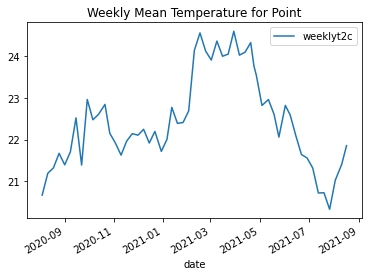

In [12]:
#plot time series for the point's weekly mean temperature

import matplotlib.pyplot as plt
# plt.close("all")

weekly_mean_temp_df.plot(kind='line', x='date', y='weeklyt2c')
plt.title("Weekly Mean Temperature for Point")

plt.show()

In [13]:
data

{'weekly_mean_temp': [{'date': '2020-08-04T00:00:00.000Z',
   'weeklyt2c': 20.667866},
  {'date': '2020-08-11T00:00:00.000Z', 'weeklyt2c': 21.19228},
  {'date': '2020-08-18T00:00:00.000Z', 'weeklyt2c': 21.322031},
  {'date': '2020-08-25T00:00:00.000Z', 'weeklyt2c': 21.670826},
  {'date': '2020-09-01T00:00:00.000Z', 'weeklyt2c': 21.395498},
  {'date': '2020-09-08T00:00:00.000Z', 'weeklyt2c': 21.702848},
  {'date': '2020-09-15T00:00:00.000Z', 'weeklyt2c': 22.521061},
  {'date': '2020-09-22T00:00:00.000Z', 'weeklyt2c': 21.389563},
  {'date': '2020-09-29T00:00:00.000Z', 'weeklyt2c': 22.963732},
  {'date': '2020-10-06T00:00:00.000Z', 'weeklyt2c': 22.476093},
  {'date': '2020-10-13T00:00:00.000Z', 'weeklyt2c': 22.606449},
  {'date': '2020-10-21T00:00:00.000Z', 'weeklyt2c': 22.845181},
  {'date': '2020-10-27T00:00:00.000Z', 'weeklyt2c': 22.152468},
  {'date': '2020-11-03T00:00:00.000Z', 'weeklyt2c': 21.915987},
  {'date': '2020-11-10T00:00:00.000Z', 'weeklyt2c': 21.628157},
  {'date': '2020-1

In [14]:
for k in xmlDict.keys():
    url = "https://eahazardswatch.icpac.net/gsky/data_api/v1/gsky/timeseries?identifier={}GeometryDrill".format(k)
    headers = {
        'Content-Type': 'application/json'
    }

    response = requests.request("POST", url, headers=headers, data=payload)
    
    response_data = json.loads(json.dumps(response.json(), indent=4, sort_keys=True))

    data['{}'.format(k)] = response_data[k]
    

data

{'weekly_mean_temp': [{'date': '2020-08-04T00:00:00.000Z',
   'weeklyt2c': 20.667866},
  {'date': '2020-08-11T00:00:00.000Z', 'weeklyt2c': 21.19228},
  {'date': '2020-08-18T00:00:00.000Z', 'weeklyt2c': 21.322031},
  {'date': '2020-08-25T00:00:00.000Z', 'weeklyt2c': 21.670826},
  {'date': '2020-09-01T00:00:00.000Z', 'weeklyt2c': 21.395498},
  {'date': '2020-09-08T00:00:00.000Z', 'weeklyt2c': 21.702848},
  {'date': '2020-09-15T00:00:00.000Z', 'weeklyt2c': 22.521061},
  {'date': '2020-09-22T00:00:00.000Z', 'weeklyt2c': 21.389563},
  {'date': '2020-09-29T00:00:00.000Z', 'weeklyt2c': 22.963732},
  {'date': '2020-10-06T00:00:00.000Z', 'weeklyt2c': 22.476093},
  {'date': '2020-10-13T00:00:00.000Z', 'weeklyt2c': 22.606449},
  {'date': '2020-10-21T00:00:00.000Z', 'weeklyt2c': 22.845181},
  {'date': '2020-10-27T00:00:00.000Z', 'weeklyt2c': 22.152468},
  {'date': '2020-11-03T00:00:00.000Z', 'weeklyt2c': 21.915987},
  {'date': '2020-11-10T00:00:00.000Z', 'weeklyt2c': 21.628157},
  {'date': '2020-1

In [16]:
# dictionary of dataframes
frames = {}

for k in data.keys():
    frames['{}_df'.format(k)] = pd.json_normalize(data[k])

In [17]:
frames

{'weekly_mean_temp_df':                         date  weeklyt2c
 0   2020-08-04T00:00:00.000Z  20.667866
 1   2020-08-11T00:00:00.000Z  21.192280
 2   2020-08-18T00:00:00.000Z  21.322031
 3   2020-08-25T00:00:00.000Z  21.670826
 4   2020-09-01T00:00:00.000Z  21.395498
 5   2020-09-08T00:00:00.000Z  21.702848
 6   2020-09-15T00:00:00.000Z  22.521061
 7   2020-09-22T00:00:00.000Z  21.389563
 8   2020-09-29T00:00:00.000Z  22.963732
 9   2020-10-06T00:00:00.000Z  22.476093
 10  2020-10-13T00:00:00.000Z  22.606449
 11  2020-10-21T00:00:00.000Z  22.845181
 12  2020-10-27T00:00:00.000Z  22.152468
 13  2020-11-03T00:00:00.000Z  21.915987
 14  2020-11-10T00:00:00.000Z  21.628157
 15  2020-11-17T00:00:00.000Z  21.967070
 16  2020-11-24T00:00:00.000Z  22.142391
 17  2020-12-01T00:00:00.000Z  22.107136
 18  2020-12-08T00:00:00.000Z  22.247562
 19  2020-12-15T00:00:00.000Z  21.918650
 20  2020-12-22T00:00:00.000Z  22.196812
 21  2020-12-30T00:00:00.000Z  21.718155
 22  2021-01-06T00:00:00.000Z  22.

In [22]:
for k in frames.keys():
    frames[k]['date'] = pd.to_datetime(frames[k]['date'])
    frames[k]['date'] = frames[k]['date'].dt.date
    frames[k]['date'] = pd.to_datetime(frames[k]['date'], format='%Y-%m-%d')

In [23]:
frames

{'weekly_mean_temp_df':          date  weeklyt2c
 0  2020-08-04  20.667866
 1  2020-08-11  21.192280
 2  2020-08-18  21.322031
 3  2020-08-25  21.670826
 4  2020-09-01  21.395498
 5  2020-09-08  21.702848
 6  2020-09-15  22.521061
 7  2020-09-22  21.389563
 8  2020-09-29  22.963732
 9  2020-10-06  22.476093
 10 2020-10-13  22.606449
 11 2020-10-21  22.845181
 12 2020-10-27  22.152468
 13 2020-11-03  21.915987
 14 2020-11-10  21.628157
 15 2020-11-17  21.967070
 16 2020-11-24  22.142391
 17 2020-12-01  22.107136
 18 2020-12-08  22.247562
 19 2020-12-15  21.918650
 20 2020-12-22  22.196812
 21 2020-12-30  21.718155
 22 2021-01-06  22.007017
 23 2021-01-12  22.774343
 24 2021-01-19  22.389889
 25 2021-01-26  22.411196
 26 2021-02-02  22.690699
 27 2021-02-09  24.142817
 28 2021-02-16  24.561069
 29 2021-02-23  24.126173
 30 2021-03-02  23.910088
 31 2021-03-09  24.365667
 32 2021-03-16  24.001202
 33 2021-03-23  24.051718
 34 2021-03-30  24.600632
 35 2021-04-06  24.027586
 36 2021-04-13 

### Plot all the available layers for a point

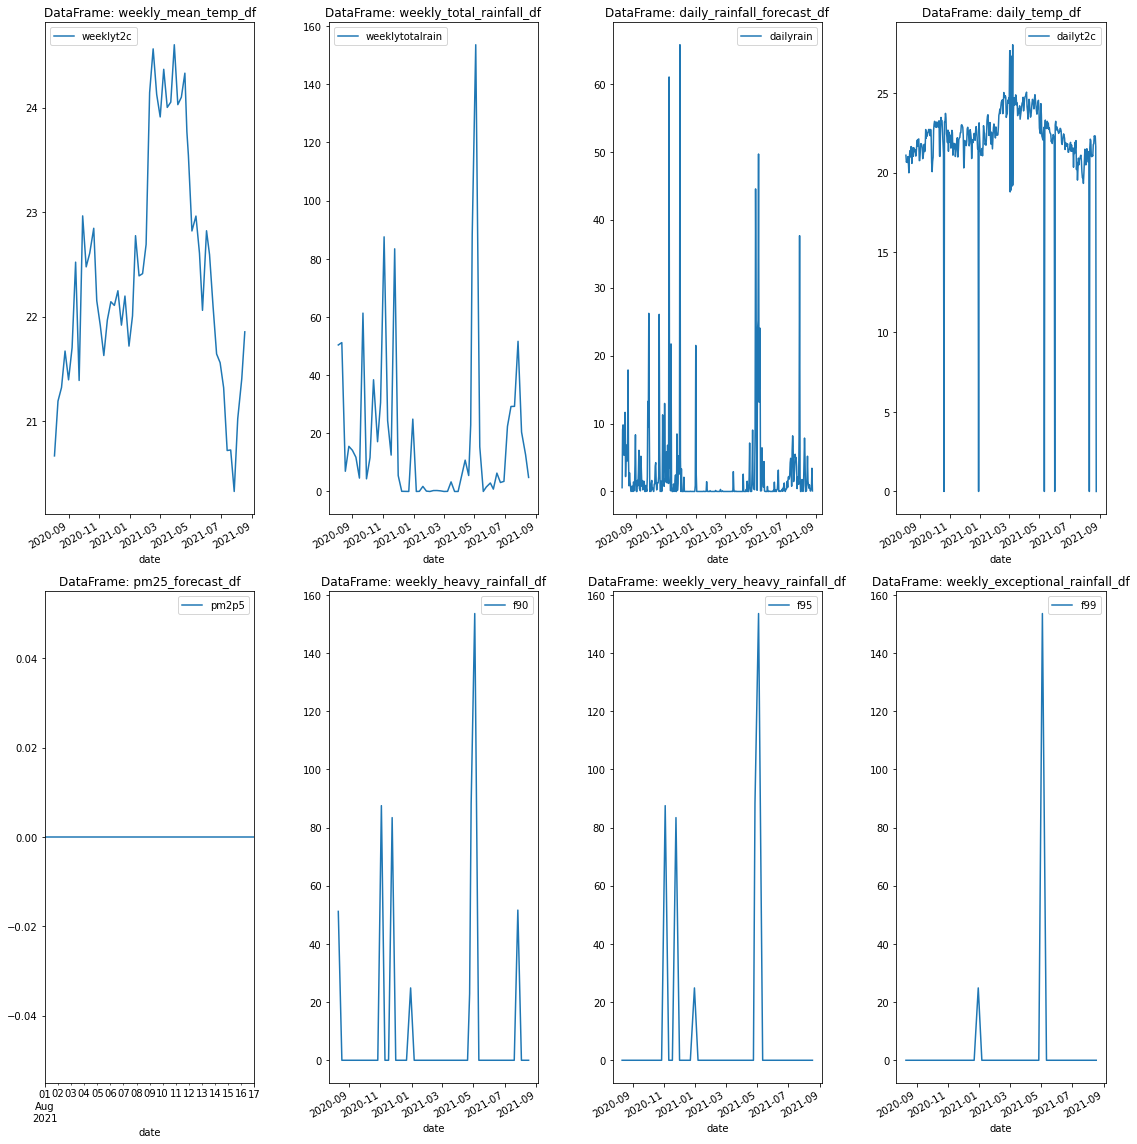

In [25]:
import math
#plot time series for the point's weekly mean temperature

# import matplotlib.pyplot as plt
# # plt.close("all")

# weekly_mean_temp_df.plot(kind='line', x='date', y='weeklyt2c')
# plt.title("Weekly Mean Temperature for Point")

# plt.show()

# determine number of rows, given the number of columns
cols = 4
rows = math.ceil(len(frames.keys()) / cols)

# create the figure with multiple axes
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 16))

# convert the axes from a 4x4 array to a 16x1 array
ax_array = axes.ravel()

# iterate through the dataframe dictionary keys and use enumerate
for idx, key in enumerate(frames.keys()):
    incorrect_layout_keys = ['daily_rainfall_forecast_df', 'daily_temp_df']
    frames[key] = frames[key].fillna(0)
    if key not in incorrect_layout_keys:
        frames[key].plot(ax=ax_array[idx], kind='line', x=frames[key].columns[0], y=frames[key].columns[1], title=f'DataFrame: {key}')
    else:
        frames[key].plot(ax=ax_array[idx], kind='line', x=frames[key].columns[1], y=frames[key].columns[0], title=f'DataFrame: {key}')
plt.tight_layout()
plt.show()


## Sending Email